In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split  # aaron said 80 20
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


plt.style.use('ggplot')


df = pd.read_csv('datasets/train.csv')

#for col in df:
 #   df[col] = le.fit_transform(df[col])


correlation_matrix_set = df


X = df.drop(columns=['obese_category'])  # 'obesity_level' is target variable
y = df['obese_category']
print(X.head())
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train will contain 80% of the data for training
# X_test and y_test will contain 20% of the data for testing








   Gender  Age  Height  Weight family_history_with_overweight  \
0    Male   24    1.70      82                            yes   
1  Female   18    1.56      57                            yes   
2  Female   18    1.71      50                            yes   
3  Female   21    1.71     131                            yes   
4    Male   32    1.91      94                            yes   

  eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
0                   yes                         2               3   
1                   yes                         2               3   
2                   yes                         2               1   
3                   yes                         3               3   
4                   yes                         3               2   

  eat_between_meals smoke  water_day monitor_calories  exercise_frequency  \
0         Sometimes    no          3               no                   0   
1        Frequently    no          2    

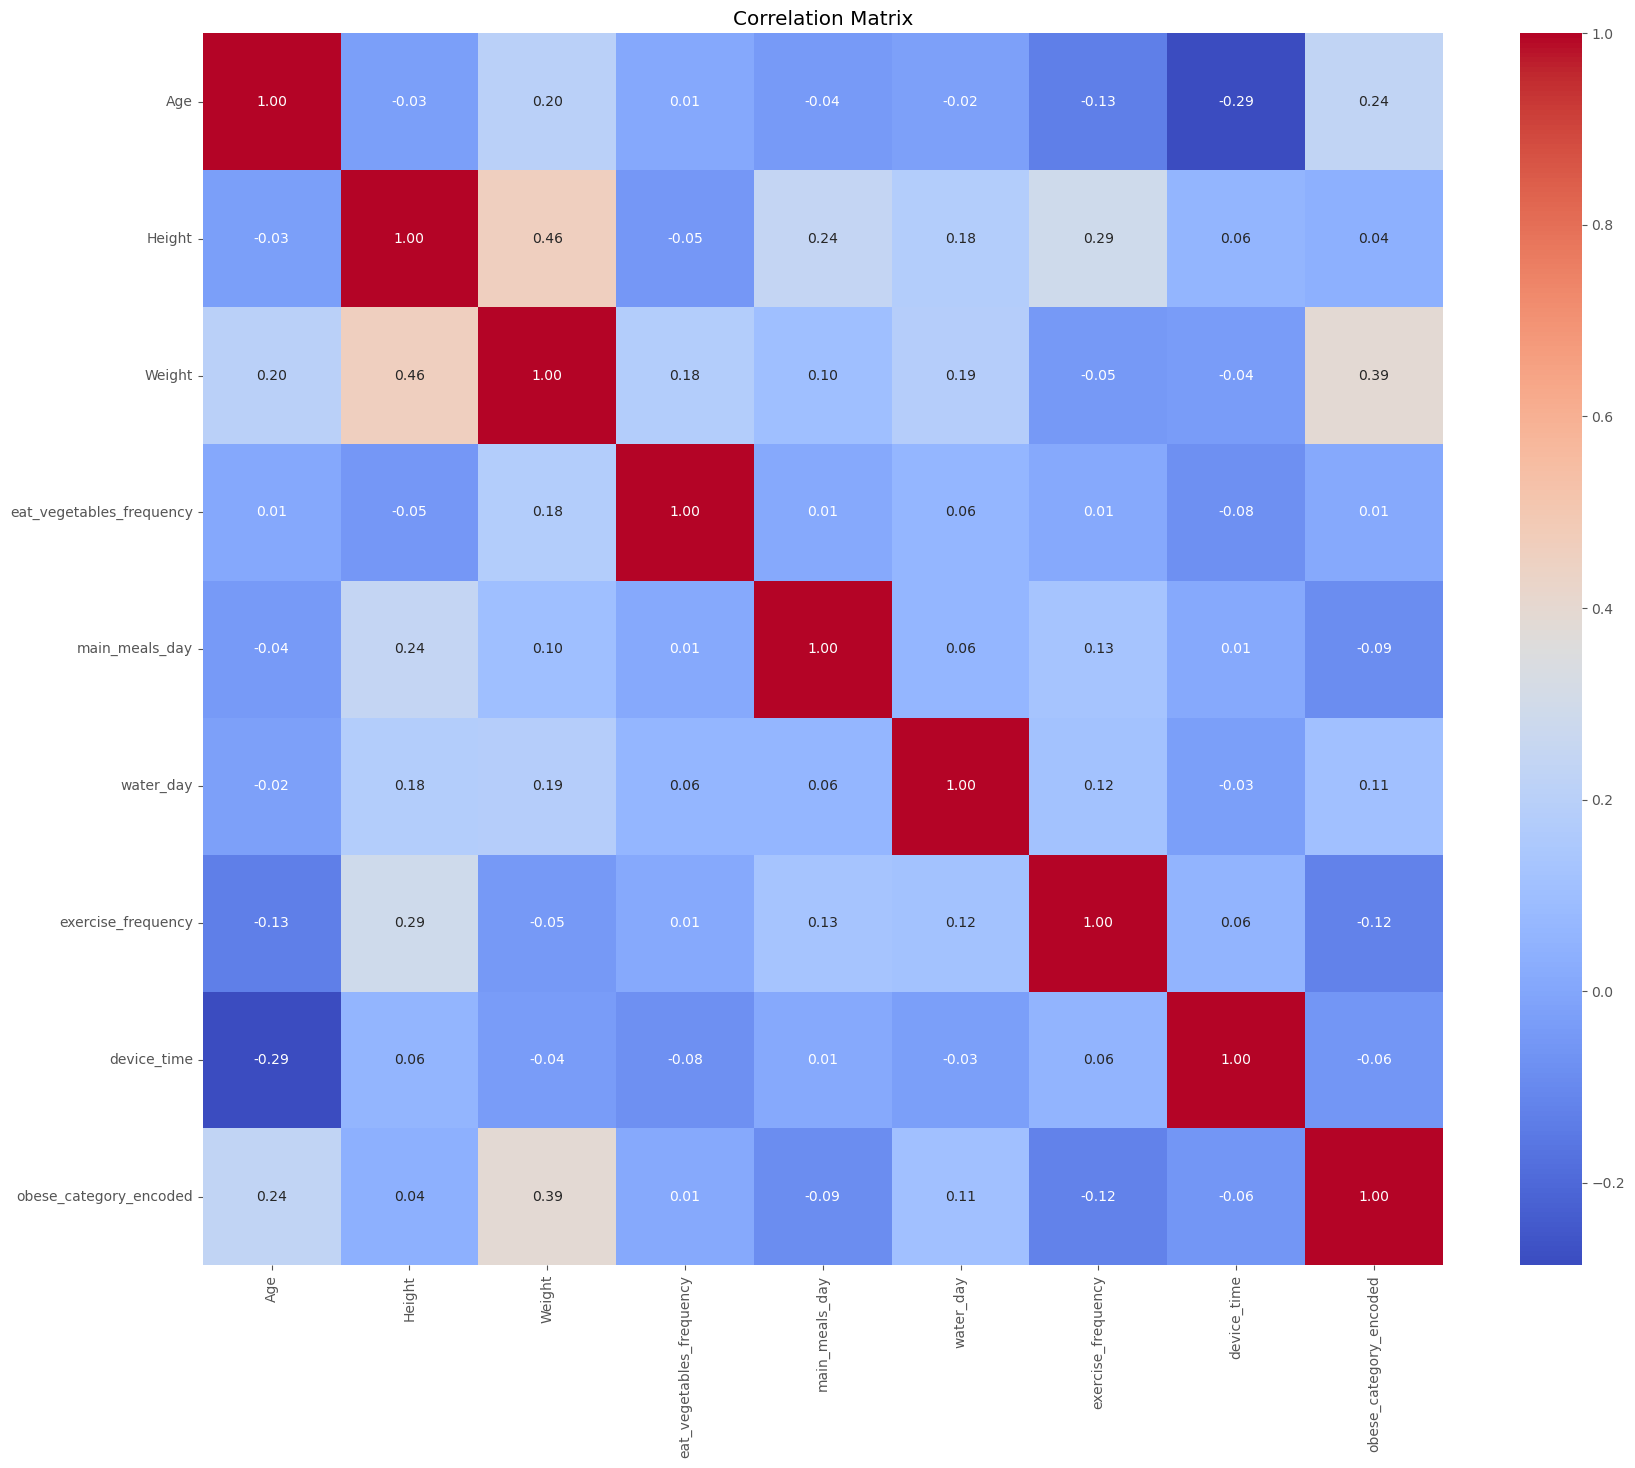

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('datasets/ObesityDataSet.csv')

# Drop 'Age' and 'Weight' columns
X2 = df.drop(columns=['Age', 'Weight']) 

# Convert categorical target variable to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['obese_category_encoded'] = label_encoder.fit_transform(df['obese_category'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [20]:
parameter_names = df.columns.tolist()
print(parameter_names)


['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'eat_high_caloric_food', 'eat_vegetables_frequency', 'main_meals_day', 'eat_between_meals', 'smoke', 'water_day', 'monitor_calories', 'exercise_frequency', 'device_time', 'drink_alcohol', 'transport_mode', 'obese_category', 'obese_category_encoded']


In [21]:
print(X.dtypes)

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
eat_high_caloric_food              object
eat_vegetables_frequency            int64
main_meals_day                      int64
eat_between_meals                  object
smoke                              object
water_day                           int64
monitor_calories                   object
exercise_frequency                  int64
device_time                         int64
drink_alcohol                      object
transport_mode                     object
dtype: object


In [22]:
X.isnull().sum() #to check for missing values, should be none for us



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
eat_high_caloric_food             0
eat_vegetables_frequency          0
main_meals_day                    0
eat_between_meals                 0
smoke                             0
water_day                         0
monitor_calories                  0
exercise_frequency                0
device_time                       0
drink_alcohol                     0
transport_mode                    0
dtype: int64

In [23]:
#target_mapping = {
 #   'Insufficient_Weight': 0,
  #  'Normal_Weight': 1,
   # 'Overweight_Level_I': 2,
    #'Overweight_Level_II': 3,
    #'Obesity_Type_I': 4,
    #'Obesity_Type_II': 5,
    #'Obesity_Type_III': 6
#}
#X['BMI'] = X['Weight']/(X['Height']**2)

#X.reset_index(drop=True, inplace=True)
#print(X.head())
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
mean = X.mean()
std = X.std()

# Calculate the lower and upper bounds
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Remove data points outside of the bounds
cleaned_X = X[(X >= lower_bound) & (X <= upper_bound)]

print(cleaned_X.head())


  Gender   Age  Height  Weight family_history_with_overweight  \
0    NaN  24.0    1.70      82                            NaN   
1    NaN  18.0    1.56      57                            NaN   
2    NaN  18.0    1.71      50                            NaN   
3    NaN  21.0    1.71     131                            NaN   
4    NaN  32.0    1.91      94                            NaN   

  eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
0                   NaN                         2               3   
1                   NaN                         2               3   
2                   NaN                         2               1   
3                   NaN                         3               3   
4                   NaN                         3               2   

  eat_between_meals smoke  water_day monitor_calories  exercise_frequency  \
0               NaN   NaN          3              NaN                   0   
1               NaN   NaN          2    

In [25]:
print(X_train.describe)

<bound method NDFrame.describe of        Gender  Age  Height  Weight family_history_with_overweight  \
9958     Male   17    1.77      97                            yes   
7841     Male   23    1.75      55                            yes   
9293     Male   22    1.82     122                            yes   
15209  Female   41    1.58      80                            yes   
16515    Male   23    1.80      95                            yes   
...       ...  ...     ...     ...                            ...   
11284  Female   18    1.72      80                            yes   
11964    Male   22    1.75      95                            yes   
5390     Male   21    1.62      68                             no   
860    Female   26    1.65     112                            yes   
15795    Male   38    1.77     108                            yes   

      eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
9958                    yes                         3           

In [26]:
print(y)

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: obese_category, Length: 20758, dtype: object


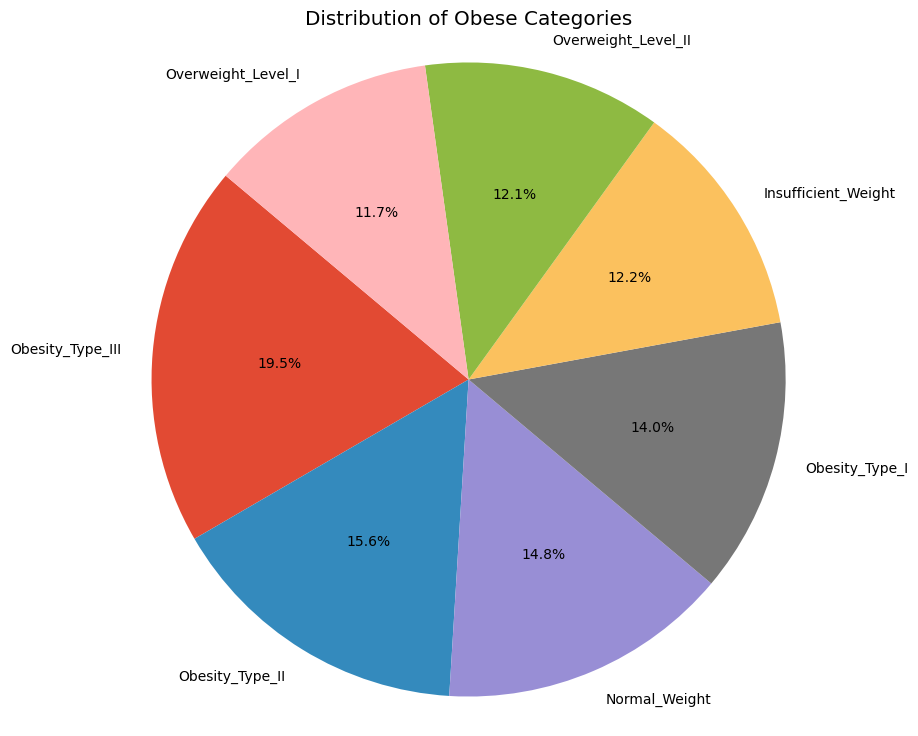

In [27]:
obese_category_counts = y.value_counts()

plt.figure(figsize=(9, 9))
plt.pie(obese_category_counts, labels=obese_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Obese Categories')
plt.show()

In [28]:
le = LabelEncoder()

!pip install xgboost

import xgboost as xgb

# Define and train XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

# Define and train XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train_encoded)

# Predictions
y_pred_encoded = xgb_clf.predict(X_test)


    
#print(X_train.head())
print(y.head())
 

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']

In [ ]:
def voting(lists):
    result = []
    num_lists = len(lists)
    num_elements = len(lists[0])  # Assuming all lists have the same length

    for i in range(num_elements):
        counts = {}  # Dictionary to store the count of each element
        for j in range(num_lists):
            element = lists[j][i]
            if element in counts:
                counts[element] += 1
            else:
                counts[element] = 1

        # Find the element with the maximum count
        max_count = max(counts.values())
        max_elements = [key for key, value in counts.items() if value == max_count]

        # If there's a tie, choose the smallest element
        max_elements.sort()
        result.append(max_elements[0])

    return result



In [ ]:
!pip install lightgbm
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgbm
from sklearn.base import BaseEstimator, ClassifierMixin


# Define the three base estimators
xgb_clf = xgb.XGBClassifier()
catboost_clf = CatBoostClassifier(verbose = 0)
lgbm_clf = lgbm.LGBMClassifier()

# Define and train all classifiers
xgb_clf.fit(X_train, y_train)
# Define and train XGBoost classifier
catboost_clf.fit(X_train, y_train)
# Define and train XGBoost classifier
lgbm_clf.fit(X_train, y_train)

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB 5.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 5.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.3 MB 4.9 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

LGBMClassifier()

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
y_pred = voting([xgb_clf.predict(X_test), catboost_clf.predict(X_test).reshape(423), lgbm_clf.predict(X_test)])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9598108747044918


In [ ]:
y_hat = voting([xgb_clf.predict(X_test), catboost_clf.predict(X_test).reshape(423), lgbm_clf.predict(X_test)])
print(y_hat)

[0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5, 4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1, 5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2, 1, 4, 0, 0, 6, 6, 0, 1, 5, 3, 3, 5, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6, 1, 6, 6, 3, 0, 5, 2, 0, 5, 2, 5, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3, 2, 1, 2, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3, 1, 2, 6, 4, 0, 4, 1, 2, 5, 6, 0, 0, 0, 3, 2, 4, 0, 2, 0, 0, 1, 3, 2, 5, 6, 5, 0, 0, 5, 1, 2, 0, 3, 0, 2, 5, 5, 6, 1, 6, 3, 4, 2, 6, 2, 6, 2, 5, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2, 4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 2, 4, 6, 3, 5, 3, 6, 0, 4, 1, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6, 5, 2, 2, 2, 1, 2, 2, 0, 5, 2, 0, 1, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2, 2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5, 2, 6, 0, 3, 2, 5, 0, 2, 0, 5, 3, 3, 6, 6, 1, 5, 0, 0, 5, 1, 6, 5, 6, 4, 5, 3, 1, 4, 5, 6, 2, 4, 6, 1, 0, 1, 4, 0, 1, 4, 2, 2, 4, 0, 1, 1, 3, 